In [1]:
import os

import numpy as np
from matplotlib import pyplot as plt
plt.style.use("ggplot")

def get_gold_undiscovered(data: str) -> np.ndarray[int]:
    maps = data.split("Aktuelle Spielkarte:")[1:]
    row_length = len(maps[0].splitlines()[1])
    num_rows = 100 // row_length
    maps = ["\n".join(map.splitlines()[1:1 + num_rows]) for map in maps]

    # (row_length, num_rows) is either (20, 5) or (10, 10)
    if row_length == 20:
        map = maps[0]
        lines = map.splitlines()
        for i in range(len(lines)):
            for j in range(len(lines[i])):
                if lines[i][j] == "🧍":
                    col_idx = j
        
        if col_idx < 10:
            maps = ["\n".join([line[:10] for line in map.splitlines()]) for map in maps]
        else:
            maps = ["\n".join([line[10:] for line in map.splitlines()]) for map in maps]

    elif row_length == 10:
        map = maps[0]
        lines = map.splitlines()
        for i in range(len(lines)):
            for j in range(len(lines[i])):
                if lines[i][j] == "🧍":
                    row_idx = i

        if row_idx < 5:
            maps = ["\n".join(map.splitlines()[:5]) for map in maps]
        else:
            maps = ["\n".join(map.splitlines()[5:]) for map in maps]


    maps_search_gold = [map for map in maps if "🟡" not in map]
    last_map = maps_search_gold[-1]
    while maps_search_gold[-2] == last_map:
        maps_search_gold.pop()
    # on last map we JUST picked up Gold

    num_grass_undiscovered = [map.count("🟩") for map in maps_search_gold]
    return np.array(num_grass_undiscovered)

def convert_undiscovered_to_exploration(num_grass_undiscovered: np.ndarray[int]) -> np.ndarray[int]:
    num_grass_newly_explored = [num_grass_undiscovered[i - 1] - num_grass_undiscovered[i] for i in range(1, len(num_grass_undiscovered))]
    return np.array(num_grass_newly_explored)

def get_gold_exploration(data: str) -> np.ndarray[int]:
    num_grass_undiscovered = get_gold_undiscovered(data)   
    return convert_undiscovered_to_exploration(num_grass_undiscovered)


Reading from /Users/a1/Dev/Tutoring/SE1/verbesserung/ExampleClient/logs/free_castle/logs_algo_ac/output_2926.txt


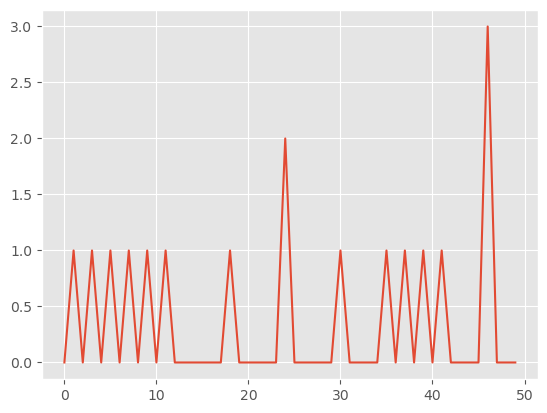

In [4]:
dirname = "/Users/a1/Dev/Tutoring/SE1/verbesserung/ExampleClient/logs/free_castle/logs_algo_ac"
n_games = len([f for f in os.listdir(dirname) if f.endswith(".txt")])
gameID = np.random.randint(0, n_games)
filename = f"{dirname}/output_{gameID}.txt"
print(f"Reading from {filename}")

with open(filename, "r") as f:
    data = f.read()

num_grass_undiscovered = get_gold_undiscovered(data)
num_grass_newly_explored = get_gold_exploration(data)
plt.plot(num_grass_newly_explored)
plt.show()


### Average behaviour

In [53]:
def get_average_exploration(dirname: str) -> np.ndarray[float]:
    exploration_progress = []

    for f in os.listdir(dirname):
        if not f.endswith(".txt"): continue

        filename = f"{dirname}/{f}"
        with open(filename, "r") as f:
            data = f.read()

        num_grass_undiscovered = get_gold_undiscovered(data)
        num_grass_newly_explored = get_gold_exploration(data)

        exploration_progress.append(num_grass_newly_explored)
        
    maxlen = max(len(ep) for ep in exploration_progress)
    exploration_progress = [np.pad(ep.astype(float), (0, maxlen - len(ep)), constant_values=(np.NaN, np.NaN)) for ep in exploration_progress]

    exploration_progress = np.stack(exploration_progress)
    exploration_progress = np.nanmean(exploration_progress, axis=0)

    exploration_progress = (exploration_progress[1:] + exploration_progress[:-1]) / 2
    return exploration_progress

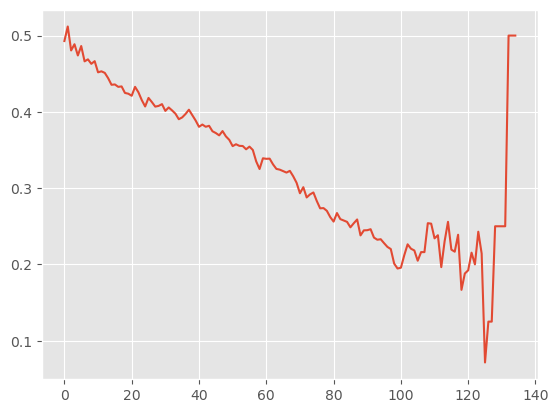

In [54]:
dirname = "/Users/a1/Dev/Tutoring/SE1/verbesserung/ExampleClient/logs/free_castle/logs_algo_ac"
exploration_progress = get_average_exploration(dirname)
plt.plot(exploration_progress)
plt.show()

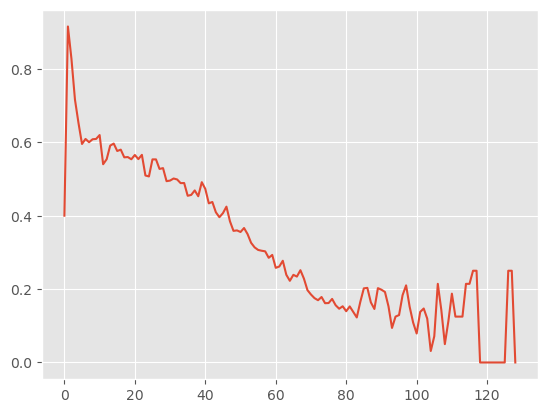

In [55]:
dirname = "/Users/a1/Dev/Tutoring/SE1/verbesserung/ExampleClient/logs/free_castle/logs_algo_full_mountains_gamma"
exploration_progress = get_average_exploration(dirname)
plt.plot(exploration_progress)
plt.show()

Compare them

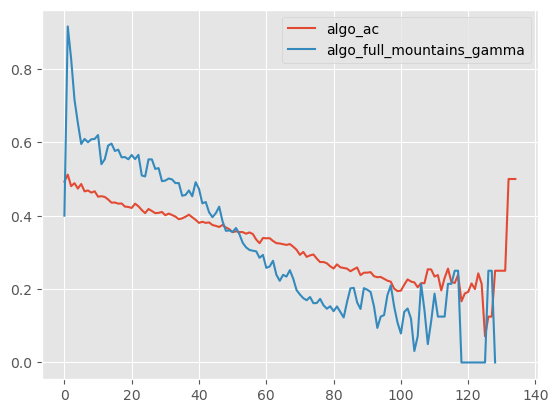

In [56]:
dirname1 = "/Users/a1/Dev/Tutoring/SE1/verbesserung/ExampleClient/logs/free_castle/logs_algo_ac"
dirname2 = "/Users/a1/Dev/Tutoring/SE1/verbesserung/ExampleClient/logs/free_castle/logs_algo_full_mountains_gamma"

exploration_progress1 = get_average_exploration(dirname1)
exploration_progress2 = get_average_exploration(dirname2)

plt.plot(exploration_progress1, label="algo_ac")
plt.plot(exploration_progress2, label="algo_full_mountains_gamma")
plt.legend()
plt.show()